## Introduction to Machine learning in accounting

In this chapter we will discus **shallow** machine learning models. Although neural networks can also be shallow, the discussion of them is postponed to Chapter 9.

### Ensemble methods

There is a saying: Two heads are better than one. What about even more heads? At least with machine learning, more heads is helpful (I am not sure about humans. :))

The idea of ensemble methods is to join many weak estimators as one efficient estimator. Using this approach, these methods achieve strong results. It is enough that the weak estimator is only slightly better than pure chance, their ensemble can still be a very efficient machine learning method.

**Example:** Let's assume that we have a weak estimator that can correctly predict the bankcruptcy of a company 52 % of a time. Thus, the predictor is only slightly better than pure chance (50 %).

However, an ensemble consisting of 100 weak estimators is correct 69,2 % of the time and an ensemble consisting of 1000 weak estimators is correct 90,3 %. of the time!

In [7]:
import scipy.stats as ss

In [22]:
binom_rv = ss.binom(100,0.52)
sum([binom_rv.pmf(i) for i in range(50,101)])

0.6918454716593883

In [23]:
binom_rv = ss.binom(1000,0.52)
sum([binom_rv.pmf(i) for i in range(500,1001)])

0.9027460086409557

In the following figure, one ellipse (a weak estimator) would a very bad classifier due to its incompatible shape with the two classes (the dots and diamonds). However, their ensemble is able to classify observations very well.

![Boost_ellips](./images/boost_ellips.png)

There are many options how the aggregate is calculated. It can be weighted average, majority, etc. depending on the application.

Very often the simple estimator in ensemble methods is the decision tree. In a decision tree, with conclusion based on the features of the model a tree structure is concstructed. From the leaves of the tree a prediction for the correct value/class can be inferred. The original decision tree structure gave only predictions for the correct class. The classification and regression trees (CART) have points instead classes in the leaves. This allows much more versatile interpretation and allows regression trees to be used also in regression applications.

Below is an example how decision trees are constructed. We have two features, equity ratio (ER) and return on assets (ROA). Based on these features, the companies are divided into three groups. First they are divided to two groups (ROA over or under *r*). Then companies in the (ROA < *r*) -group are divided based on the equity ratio (over or under *p*).

![dec_tree](./images/dec_tree.png)

The interpretation of symbols: diamond: no bankcruptcy risk, cross: low bankcruptcy risk, circle: high banckruptcy risk

![dec_tree](./images/dec_tree2.png)

The most common ensemble methods are bagging, random forest and boosting. They differ in how they decrease the correlation between their predictions. The benefit of ensemble methods increases when the correlation decreases.

The bagging (bootstrap aggregating) method decreases the correlation by feeding bootstrap samples to the weak estimators.

![bagging](./images/bagging.png)

The original random forest algorithm decreased correlation by feeding a subsample of features to the weak estimators (random subspace method). Later, the bootstrap aggregating of bagging was added to the method.

![random_forest](./images/rand_forest.png)

In recent year, boosting and especially gradient boosting has been a very popular ensemble method in applications.
In Boosting, weak estimators work in series. The idea is to feed the data again to a new weak learner so that the weight of misclassified points is increased. After training, the aggreaget estimate of the weak learners is calculated as a weighted mean. The largest weight is given to those learners, whose error function value was smallest.

![boosting](./images/boost.png)



Xgboost has probably been the most succesfull boosting method. It is very often behind the winning solutions of different machine learning competitions ([www.kaggle.com](https://www.kaggle.com)). Here is a short info from the Xgboost github-page: "XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Kubernetes, Hadoop, SGE, MPI, Dask) and can solve problems beyond billions of examples."

Later in the book, we will see an example using Xgboost.

Epälineaarinen vaikutuksen analysointi
Bootstrapilla mukaan myös tilastollinen merkitsevyys
Automaattinen mallin etsintä. Analyytikon ei tarvitse keksiä, onko riippuvuus muotoa 𝑥, 𝑥^2,𝑥^3 jne…


### Support vector machines
The Support Vector Machine (SVM) was previously one of the most popular algorithms in modern machine learning. It often provides very impressive classification performance on reasonably sized datasets. However, SVMs have difficulties with large datasets since the computations don’t scale well with the number of training examples. This poor performance with large datasets hinders somewhat their success in big data and is the reason why neural networks have partly replaced SVMs in that field. However, in accounting we have often datasets of modest size and SVMs work very well with them.

![SVM](./images/SVM_margin.png)

### Key ML libraries in Python

#### Numpy

Although Numpy is not exactly a machine learning library, it is the backbone of many other ML libraries and the most important library for numerical computing in Python. Therefore, we start our journey of ML libraries with the basics of NumPy.

The key feature of Numpy is its flexible and fast multidimensional **ndarray** that can contain large datasets. It enables mathematical operations between arrays in a way that is very similar to calculations with scalars.

In [2]:
import numpy as np

In [8]:
random_values = np.random.randint(100,200,(4,4))

In [9]:
random_values

array([[117, 106, 194, 165],
       [109, 182, 151, 142],
       [150, 164, 131, 162],
       [169, 105, 176, 131]])

Mathematical operations are then very easy to perform. The default is almost always element-vise operations.

In [10]:
random_values*10

array([[1170, 1060, 1940, 1650],
       [1090, 1820, 1510, 1420],
       [1500, 1640, 1310, 1620],
       [1690, 1050, 1760, 1310]])

In [11]:
random_values/100

array([[1.17, 1.06, 1.94, 1.65],
       [1.09, 1.82, 1.51, 1.42],
       [1.5 , 1.64, 1.31, 1.62],
       [1.69, 1.05, 1.76, 1.31]])

In [13]:
random_values + random_values

array([[234, 212, 388, 330],
       [218, 364, 302, 284],
       [300, 328, 262, 324],
       [338, 210, 352, 262]])

In [12]:
np.log(random_values)

array([[4.76217393, 4.66343909, 5.26785816, 5.10594547],
       [4.69134788, 5.20400669, 5.01727984, 4.95582706],
       [5.01063529, 5.09986643, 4.87519732, 5.08759634],
       [5.12989871, 4.65396035, 5.170484  , 4.87519732]])

Every Numpy array has a shape parameter that can be used to check the shape of your array.

In [14]:
random_values.shape

(4, 4)

Notice that the array can be, and very commonly is in machine learnig, more than two-dimensional. Here is a four-dimensional array.

In [20]:
randoms = np.random.randint(10,20,(2,2,2,2))

In [21]:
randoms

array([[[[14, 15],
         [17, 10]],

        [[17, 15],
         [16, 17]]],


       [[[18, 19],
         [16, 18]],

        [[16, 13],
         [10, 10]]]])

Numpy has **array()** for creating Numpy arrays. Many kinds of collections are accepted as inputs.

In [34]:
sample_list = [i**2 for i in range(10)]

In [35]:
sample_list

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [36]:
sample_np = np.array(sample_list)

In [37]:
sample_np

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

Two-dimensional arrays can be built from list of lists, etc.

In [38]:
sample_list2 = [[i,i**2] for i in range(10)]

In [39]:
sample2_np = np.array(sample_list2)

In [40]:
sample2_np.shape

(10, 2)

You can check the dimensions with **ndim**.

In [41]:
sample2_np.ndim

2

You can quickly create arrays of zeros and ones with **zeros()** and **ones()**.

In [42]:
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [43]:
np.ones((3,2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

Python is flexible, because you do not need to specify the datatype of your variables. Python will recognise it automatically. However, with low-level languages, like C, you need to specify the type of your data. Therefore, to enable efficient computing and connection to low-level languages, Numpy uses a special **dtype** object to define its arrays.

In [45]:
sample2_np.dtype

dtype('int32')

In [46]:
np.array([[1.1,2.2],[3.3,4.4]]).dtype

dtype('float64')

Full list of Numpy datatypes can be found here: [numpy.org/devdocs/user/basics.types.html](https://numpy.org/devdocs/user/basics.types.html). **Astype()** is an important function in Numpy. It can be used to change the **dtype** of an array. It also works with Pandas dataframes.

In [48]:
sample2_np.astype('float64') # Notice the dots.

array([[ 0.,  0.],
       [ 1.,  1.],
       [ 2.,  4.],
       [ 3.,  9.],
       [ 4., 16.],
       [ 5., 25.],
       [ 6., 36.],
       [ 7., 49.],
       [ 8., 64.],
       [ 9., 81.]])

Note that if you transform floats to integers, they will be truncated.

In [49]:
np.array([[3.4,2.3],[4.5,2.1]]).astype('int64')

array([[3, 2],
       [4, 2]], dtype=int64)

*Vectorisation* is an important concept in Numpy. It means that you can do operations to whole arrays without using for loops. This is essential in many kinds of machine learning operations.

In [54]:
sample3_np = np.random.normal(size = (2,3))

In [55]:
sample3_np

array([[-0.67797176, -0.94909179, -1.3507424 ],
       [-1.91892886,  1.61290875, -1.7005215 ]])

In [56]:
sample3_np*sample3_np

array([[0.4596457 , 0.90077523, 1.82450504],
       [3.68228798, 2.60147463, 2.89177337]])

Because of the vectorisation, for example simulations are very easy to do in Numpy.

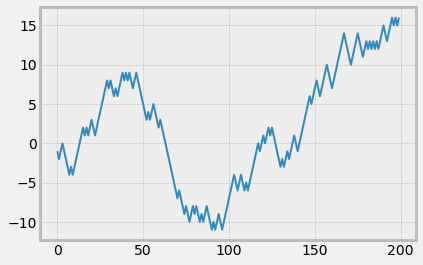

In [173]:
coin_np = np.random.randint(0,2,200)

coin_np = np.where(coin_np>0,1,-1)

import matplotlib.pyplot as plt

plt.style.use('bmh')

plt.plot(coin_np.cumsum())

Dividing with an array works also element-wise.

In [57]:
1 / np.array([[1,2],[3,4]])

array([[1.        , 0.5       ],
       [0.33333333, 0.25      ]])

Broadcasting means that the operation of a smaller array is repeated through the larger array.

In [81]:
sample4_np = np.array([[1,2,3],[4,5,6]])

In [83]:
sample4_np + [1,1,1]

array([[2, 3, 4],
       [5, 6, 7]])

Comparison between arrays return a boolen ndarray.

In [67]:
rand1_np = np.random.normal(size=(2,2))
rand2_np = np.random.normal(size=(2,2))

In [68]:
rand1_np > rand2_np

array([[False,  True],
       [False,  True]])

Slicing works efficiently with Numpy.

In [74]:
rand3_np = np.random.randint(1,10,(3,4))

In [75]:
rand3_np

array([[2, 8, 3, 5],
       [5, 6, 6, 7],
       [7, 2, 2, 7]])

In [77]:
rand3_np[1]

array([5, 6, 6, 7])

Note that the starting value of a slice is not included. Overall, slicing with multi-dimensional arrays is something that needs practice. Experiment with different multidimensional arrays to learn the details of slicing.

In [80]:
rand3_np[1,2:4]

array([6, 7])

Broadcasting is also applied, when assigning values to slices

In [84]:
rand3_np[1] = 1

In [85]:
rand3_np

array([[2, 8, 3, 5],
       [1, 1, 1, 1],
       [7, 2, 2, 7]])

You can use booleans to pick values that satisfy a certain criteria. Notice that the result here is transformend as a one-dimensional array.

In [87]:
rand3_np[rand3_np < 5]

array([2, 3, 1, 1, 1, 1, 2, 2])

You can use also lists to select specific rows/columns.

In [88]:
rand3_np[[0,2]]

array([[2, 8, 3, 5],
       [7, 2, 2, 7]])

In [89]:
rand3_np[:,[0,2]]

array([[2, 3],
       [1, 1],
       [7, 2]])

You can easily reshape an array with **reshape**.

In [92]:
reshaped_np = np.arange(12).reshape((3,4))

In [93]:
reshaped_np

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

There is a special attribute **T** that can be used to transpose an array.

In [95]:
reshaped_np.T

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

Numpy has many other matrix operation functions also. The full list can be found here: [numpy.org/doc/stable/reference/routines.linalg.html](https://numpy.org/doc/stable/reference/routines.linalg.html)

In [97]:
np.dot(reshaped_np,reshaped_np.T) # Inner product

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

You can also calculate the product like this:

In [150]:
reshaped_np.dot(reshaped_np.T)

array([[ 14,  38,  62],
       [ 38, 126, 214],
       [ 62, 214, 366]])

In [103]:
np.cross(reshaped_np[:2,:2],reshaped_np[:2,:2].T)

array([ 0, 15])

Numpy uses for matrix operations low-level libraries, so they are as efficient as the same operations, for example, in Matlab. 

In [156]:
square_np = np.random.normal(0,1,(3,3))

In [157]:
square_np

array([[-1.32323449, -1.21413189, -0.07163332],
       [-0.12818076,  1.16629268,  1.90356545],
       [-0.94237797, -0.20009899,  0.34774801]])

In [158]:
np.linalg.inv(square_np)

array([[ 0.78442039,  0.43540389, -2.22180757],
       [-1.74472811, -0.5262777 ,  2.52143318],
       [ 1.12179554,  0.87709316, -1.69446344]])

Here is an example of calculation errors that happens now and then with computers. The off-diagonal values should be exactly zero.

In [160]:
np.dot(square_np,np.linalg.inv(square_np))

array([[ 1.00000000e+00, -1.25990249e-17, -1.11389608e-16],
       [-1.09324233e-16,  1.00000000e+00,  2.40105310e-16],
       [ 6.94025223e-17,  5.47230419e-17,  1.00000000e+00]])

Singular value decomposition.

In [161]:
np.linalg.svd(square_np)

(array([[-0.50198711, -0.7141179 , -0.4878981 ],
        [ 0.86310232, -0.44973666, -0.22976362],
        [-0.05534735, -0.53644436,  0.84211883]]),
 array([2.40192331, 1.86007397, 0.22441303]),
 array([[ 0.25220275,  0.6774502 ,  0.69098119],
        [ 0.81078839,  0.24184561, -0.53304117],
        [-0.52821961,  0.69467397, -0.48827463]]))

There is also **swapaxes** that can be used to swap. So, for two-dimensinal arrays it is the same as transpose. But for higher-dimensional arrays, it gives more possibilities.

In [112]:
more_np = np.random.randint(1,10,size=(2,2,3))

In [113]:
more_np

array([[[6, 9, 8],
        [7, 7, 5]],

       [[3, 2, 7],
        [8, 7, 4]]])

In [114]:
more_np.swapaxes(0,2)

array([[[6, 3],
        [7, 8]],

       [[9, 2],
        [7, 7]],

       [[8, 7],
        [5, 4]]])

Numpy has many convenient functions for element-wise operations, called universal functions. Let's look some of them. The full list can be found here: [numpy.org/doc/stable/reference/ufuncs.html](https://numpy.org/doc/stable/reference/ufuncs.html)

In [115]:
np.sqrt(more_np)

array([[[2.44948974, 3.        , 2.82842712],
        [2.64575131, 2.64575131, 2.23606798]],

       [[1.73205081, 1.41421356, 2.64575131],
        [2.82842712, 2.64575131, 2.        ]]])

In [116]:
np.exp(more_np)

array([[[4.03428793e+02, 8.10308393e+03, 2.98095799e+03],
        [1.09663316e+03, 1.09663316e+03, 1.48413159e+02]],

       [[2.00855369e+01, 7.38905610e+00, 1.09663316e+03],
        [2.98095799e+03, 1.09663316e+03, 5.45981500e+01]]])

In [118]:
array1_np = np.random.randint(1,10,size=(2,3))
array2_np = np.random.randint(1,10,size=(2,3))

In [120]:
array1_np

array([[5, 7, 5],
       [3, 3, 4]])

In [121]:
array2_np

array([[4, 7, 7],
       [7, 9, 2]])

In [119]:
np.maximum(array1_np,array2_np)

array([[5, 7, 7],
       [7, 9, 4]])

Numpy **where** is a very important function if you want to do conditional operations with arrays.

In [131]:
a_array_np = np.random.randint(1,10,(2,3))
b_array_np = np.random.randint(1,10,(2,3))
bool_np = np.array([[True,False,True],[False,True,False]])

In [132]:
a_array_np

array([[5, 6, 3],
       [3, 7, 3]])

In [133]:
b_array_np

array([[9, 7, 3],
       [5, 6, 6]])

In [134]:
np.where(bool_np,a_array_np,b_array_np)

array([[5, 7, 3],
       [5, 7, 6]])

There is also a sorting function in Numpy. At default, it sorts values along the last axis:

In [137]:
np.sort(b_array_np)

array([[3, 7, 9],
       [5, 6, 6]])

In [138]:
np.sort(b_array_np,axis=0)

array([[5, 6, 3],
       [9, 7, 6]])

In [139]:
np.sort(b_array_np,axis=None)

array([3, 5, 6, 6, 7, 9])

**Unique** is a Numpy version of **set**.

In [147]:
large_np = np.random.randint(1,10,size=(6,6))

In [148]:
large_np

array([[6, 2, 8, 2, 8, 6],
       [9, 4, 3, 3, 3, 7],
       [6, 1, 8, 8, 4, 6],
       [6, 1, 2, 4, 3, 5],
       [1, 5, 6, 8, 9, 7],
       [2, 9, 3, 1, 7, 8]])

In [149]:
np.unique(large_np)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

#### Scikit-learn

Scikit-learn is a multi-purpose machine learning library. It has modules for many different machine learning approaches. It is not the best library in any machine learning field but very good at most of them. Also, all the approaches use the common workflow approach of the library. Thus, by learning to do one machine learning analysis, you learn to do them all.

Scikit-learn has libraries for classification, regression, clustering, dimensionality reduction, model selection and preprocessing. It also has an extensive library of methods for data pre-processing.

A very convenient feature in Scikit-learn is **pipeline** that you can use to construct full workflows of machine learning analyses.

There should be now difficulties to install Scikit-learn. With Python/Pip you just execute **pip install scikit-learn** and with Anaconda you just install it from the menu (or use **conda install scikit-learn** in the command line). (Actually, you should not need to do that as Scikit-learn is installed in Anaconda by default.)

Again, the best way to learn Scikit-learn is by going through examples. Thus, more  details are in the following examples.

Our sample dataset consists of few key financials of the largest US companies. Let's load it.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
plt.style.use('bmh')

Example data from [www.kaggle.com/c/companies-bankruptcy-forecast](https://www.kaggle.com/c/companies-bankruptcy-forecast)

In [170]:
table_df = pd.read_csv('ml_data.csv')[['Attr1','Attr8','Attr21','Attr4',
                                       'Attr5','Attr29','Attr20','Attr12',
                                       'Attr15','Attr6','Attr24','Attr44','Attr47','class']]

In [171]:
table_df

,Attr1,Attr8,Attr21,Attr4,Attr5,Attr29,Attr20,Attr12,Attr15,Attr6,Attr24,Attr44,Attr47,class
0,-0.031545,0.641242,-0.016440,-0.013529,0.007406,-0.631107,-0.070344,-0.036576,-0.005305,-0.016047,-0.004522,-0.009084,-0.041943,0
1,-0.231729,0.074710,-0.016961,-0.080975,0.007515,-1.168550,-0.047947,-0.299606,-0.119627,-0.016047,0.048932,-0.009659,-0.035025,0
2,-0.058602,-0.456287,-0.017504,-0.189489,0.006572,0.096212,0.001761,-0.151208,0.009484,-0.016047,0.030648,-0.016517,-0.012947,0
3,-0.069376,-0.462971,-0.016114,-0.140032,0.007477,0.296277,-0.006430,-0.145529,0.045912,-0.010915,-0.038157,0.020758,-0.016611,0
4,0.236424,0.097183,-0.016046,-0.014680,0.007879,-0.501471,-0.043107,0.208686,-0.021015,-0.016047,0.107718,-0.011036,-0.031184,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.079533,-0.374739,-0.016179,-0.189873,0.006687,0.162211,0.002114,-0.165392,0.081838,-0.006462,-0.035782,0.006482,-0.015742,0
9996,-0.081046,0.689695,-0.016507,0.021280,0.007497,0.630702,-0.022646,-0.169328,-0.018260,-0.034968,-0.077787,-0.017303,-0.025363,0
9997,-0.230571,-0.471830,-0.016167,-0.222373,0.006716,1.249499,-0.034307,-0.287411,-0.059516,-0.013742,-0.044481,-0.006031,-0.028940,0
9998,-0.108156,-0.355796,-0.016352,-0.042692,0.008123,-0.640261,-0.059005,-0.204565,0.021498,-0.018374,-0.054959,0.001036,-0.038411,0


In [172]:
table_df.rename({'Attr1' : 'ROA','Attr8' : 'Leverage','Attr21' : 'Sales-growth',
                 'Attr4' : 'Current ratio','Attr5' : 'Quick ratio','Attr29' : 'Log(Total assets)',
                 'Attr20' : 'Inventory*365/sales','Attr12' : 'Gross_prof/st_liab',
                'Attr15' : 'Total_liab*365/(gross_prof+depr)','Attr6' : 'Ret_earnings/TA',
                'Attr24' : 'Gross_prof/TA(3yr)','Attr44' : 'Receiv*365/sales',
                'Attr47' : 'Inv*365/CoGS'},axis=1,inplace=True)

In [173]:
table_df = table_df.clip(lower=table_df.quantile(0.01),upper=table_df.quantile(0.99),axis=1)

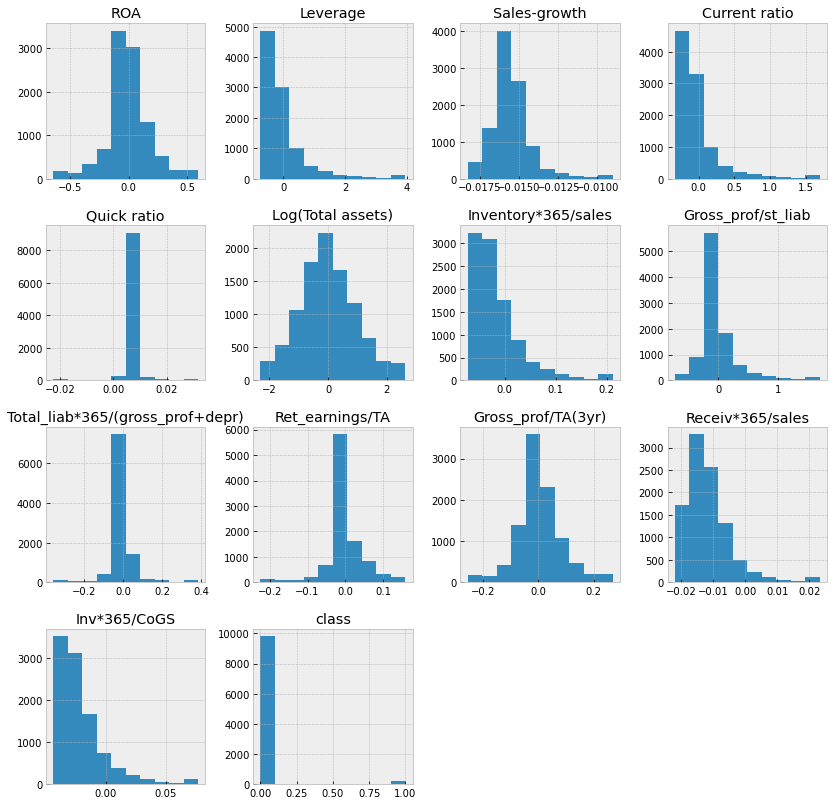

In [175]:
table_df.hist(figsize=(14,14))
plt.show()

In [176]:
X = table_df.drop(['ROA','class'],axis=1)

In [177]:
y = table_df['ROA']

In [178]:
from sklearn.model_selection import train_test_split

Let's make things difficult for OLS (very small train set).

In [248]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.995, random_state=1)

In [249]:
len(X_train)

50

#### Linear model

Although Scikit-learn is a ML library, it is possible to do a basic linear regression analysis with it. (All ML methods are statistical methods. The separation between them is artificial.)

In [250]:
import sklearn.linear_model as sk_lm

In [251]:
model = sk_lm.LinearRegression()

In [254]:
model.fit(X_train,y_train)

LinearRegression()

In [255]:
model.coef_

array([-0.00677213,  0.77339469, -0.11731442,  0.44628022, -0.01783769,
       -0.54783636,  0.15551761,  0.24205175,  0.1214785 ,  1.9324954 ,
        6.64194553,  1.18144939])

In [256]:
model.intercept_

0.10151311589661385

In [257]:
model.score(X_test,y_test)

0.5629508638436238

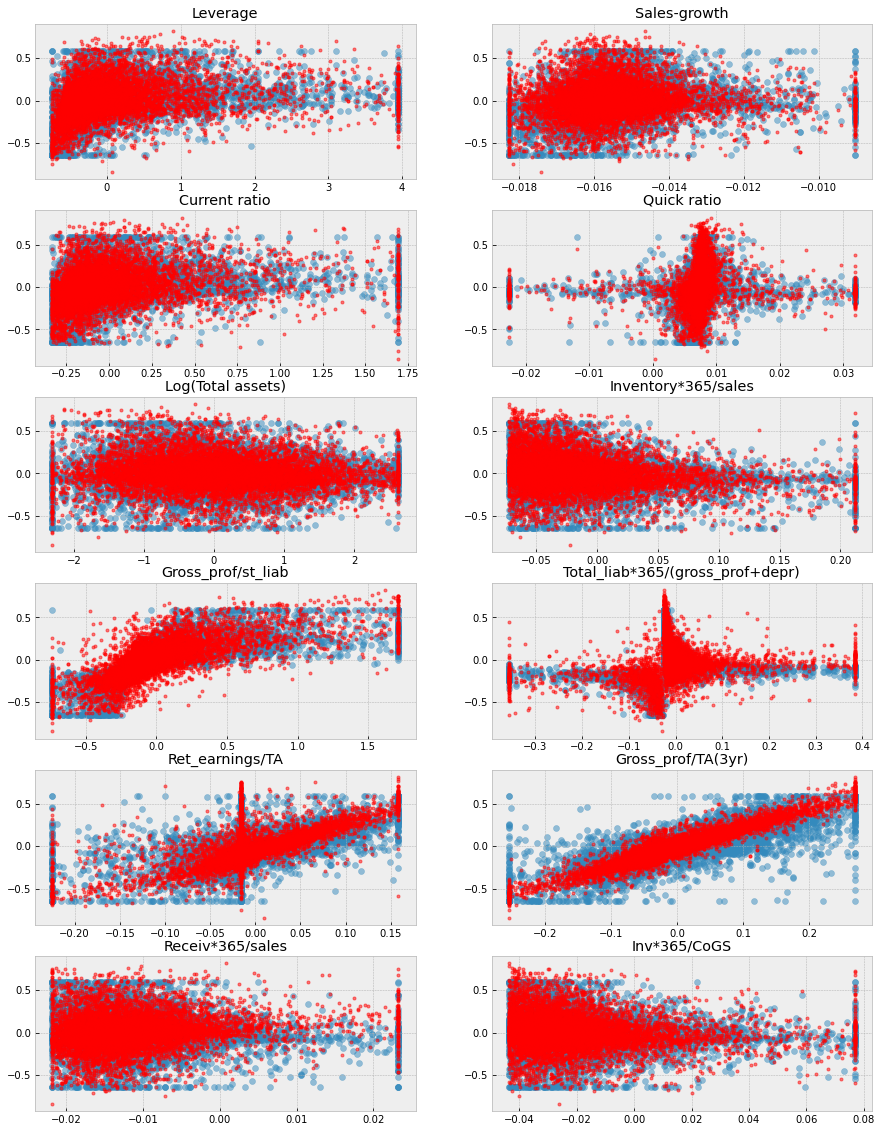

In [258]:
fig, axs = plt.subplots(6,2,figsize=(15,20))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.5)
    ax.plot(X_test[feature],model.predict(X_test),'r.',alpha=0.5)
    ax.set_title(feature)

In [259]:
from sklearn.metrics import mean_squared_error

In [260]:
mean_squared_error(y_test,model.predict(X_test))

0.0153028503099343

#### Ridge regression

Ridge regression counters overfitting by adding a penalty on the size if the coefficients of the standard linear regression model.

We can optimise the alpha parameter of the error function automatically using **RidgeCV**.

In [261]:
alpha_set = np.logspace(-10,10,21)

In [262]:
ridgecv = sk_lm.RidgeCV(alphas = alpha_set,cv=5, scoring = 'neg_mean_squared_error', normalize = True)

In [263]:
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10]),
        cv=5, normalize=True, scoring='neg_mean_squared_error')

As you can see, the coefficients have decreases. But only a little.

In [264]:
ridgecv.coef_

array([-0.01540044, -3.12519385, -0.06444324,  0.34387429, -0.00970199,
       -0.35876438,  0.17407056,  0.20761134,  0.22395114,  1.62630975,
        4.72095494,  0.8152974 ])

In [265]:
ridgecv.intercept_

0.01662359231215951

In [266]:
ridgecv.alpha_

0.1

Ridge regression decreases  the variation of predictions.

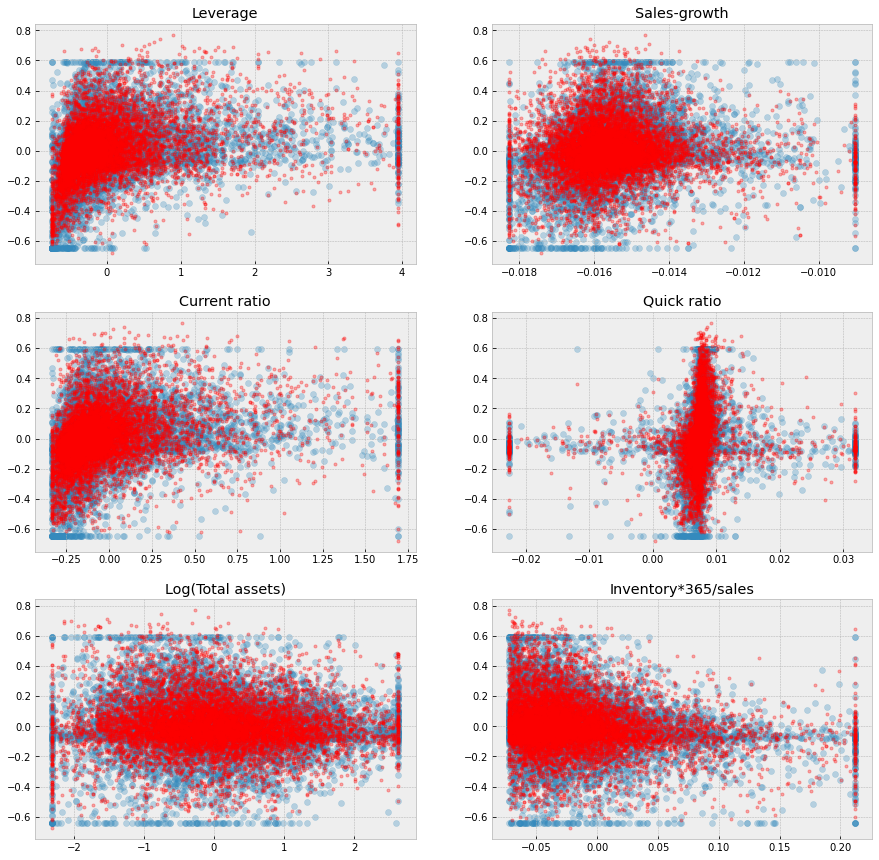

In [267]:
fig, axs = plt.subplots(3,2,figsize=(15,15))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.3)
    ax.plot(X_test[feature],ridgecv.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

In [268]:
mean_squared_error(y_test,ridgecv.predict(X_test))

0.012779896672943086

#### The Lasso

Let's try next the lasso.

In [269]:
alpha_set = np.logspace(-5,5,21)

In [270]:
lassocv = sk_lm.LassoCV(alphas = None,cv=10,max_iter=100000, normalize = True)

In [271]:
lassocv.fit(X_train,y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

As you can see, the coefficients have decreases. But only a little.

In [272]:
lassocv.coef_

array([-0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.04763644,  0.        ,  0.        ,  1.63626873,
        0.        ,  0.        ])

In [273]:
lassocv.intercept_

-0.00518692530612317

In [274]:
lassocv.alpha_

0.004070594118699143

Ridge regression decreases  the variation of predictions.

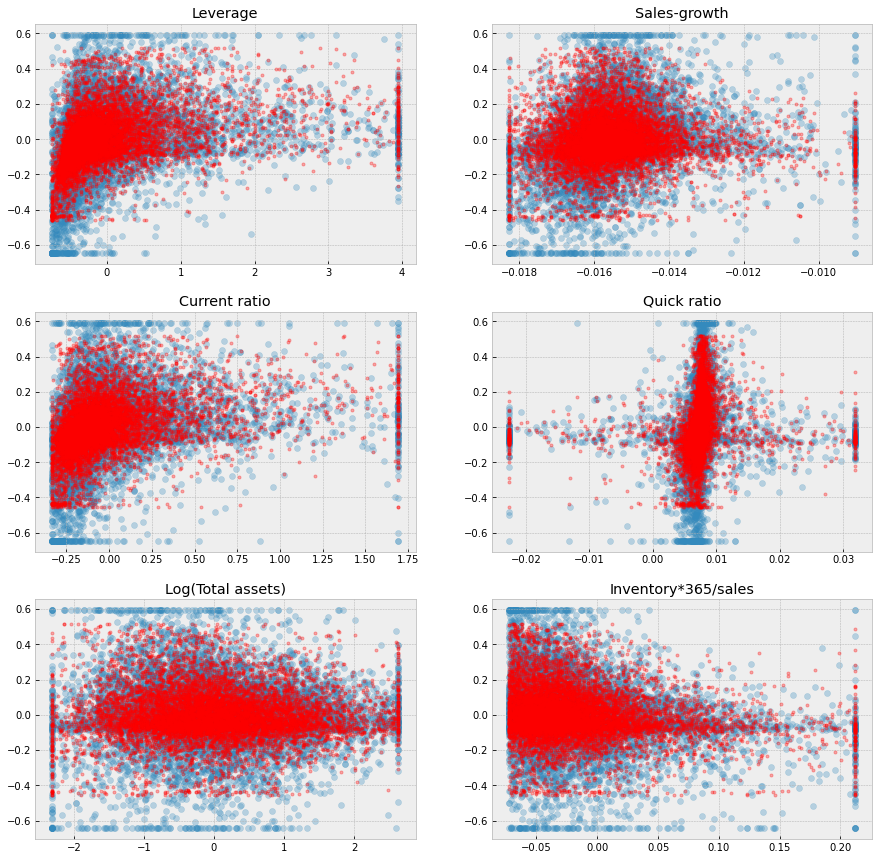

In [275]:
fig, axs = plt.subplots(3,2,figsize=(15,15))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.3)
    ax.plot(X_test[feature],lassocv.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

In [276]:
mean_squared_error(y_test,lassocv.predict(X_test))

0.01313240946567904

As you can see from the results, the Lasso and ridge regression are usefuly only when n is close to p.

In [295]:
lasso_model = sk_lm.Lasso(alpha = 0.01,max_iter=100000, normalize = True)

In [296]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.01, max_iter=100000, normalize=True)

As you can see, the coefficients have decreases. But only a little.

In [297]:
lasso_model.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  1.15219894,
        0.        ,  0.        ])

In [298]:
lasso_model.intercept_

-0.015156386510693794

Ridge regression decreases  the variation of predictions.

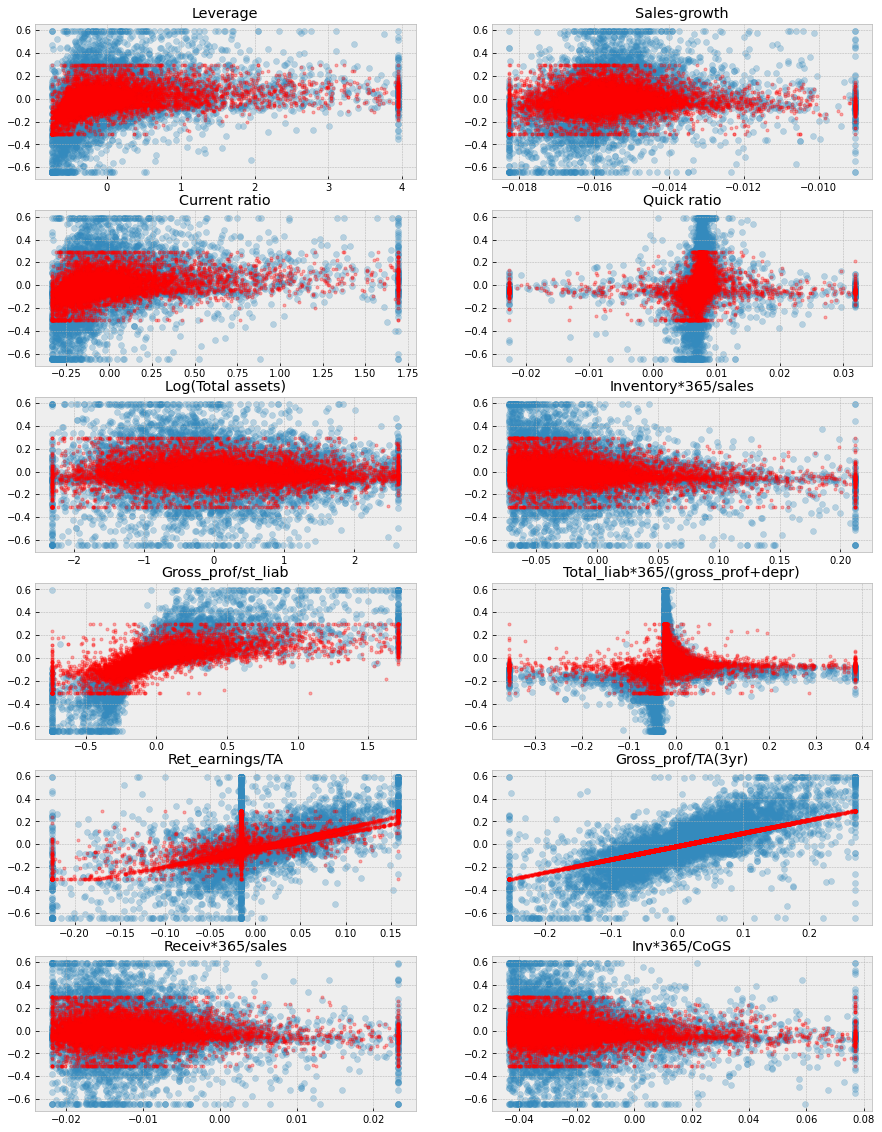

In [301]:
fig, axs = plt.subplots(6,2,figsize=(15,20))
for ax,feature,coef in zip(axs.flat,X_test.columns,model.coef_):
    ax.scatter(X_test[feature],y_test,alpha=0.3)
    ax.plot(X_test[feature],lasso_model.predict(X_test),'r.',alpha=0.3)
    ax.set_title(feature)

In [302]:
mean_squared_error(y_test,lasso_model.predict(X_test))

0.016881523757905623

#### Bayesian ridge regression